# Maximum Likelihood Estimation

## Distinguishing Likelihood From Probability

- Probability attaches to **possible results**
- Likelihood attaches to **hypotheses**

Possible results 是互斥 (mutually exclusive) 和能够穷尽的 (exhaustive). 比如猜测抛十次硬币的结果, 那么会有 11 个可能的结果 (possible results). 这 11 个可能的结果指的是预测正确的次数 (比如: 一次也没预测正确为 0, 猜对了一次为 1, 猜对了 2 次为 2, 依次类推会猜对 0 - 10 次共计 11 个结果). 实际结果有且仅有 1 个. 因此, 可能结果的概率合计是 1.

Hypotheses, 不像结果, 它既不是互斥的也不能够穷尽. 比如在上面的例子中猜对了 7 次, 我们可能会假设 (hypothesize) 这个做测试的人是胡乱猜对的, 也可能假设这个人有未卜先知的能力. 这些都是不同的假设, 他们既不互斥 (因为我们说的都是可能, 我说的可能性中包含你说的可能性) 也无法穷尽 (比如另外一个人假设说这个做测试的人不仅有未卜先知的能力还有些超能力).

所有的假设 (hypotheses) 合起来我们可以称为似然 (likelihood), 它受限于我们的想象力. 实际上我们几乎不能想象出所有假设. 我们关心的是估计实现结果在多大程度上影响我们和其他人目前所持假设的相对可能性, 也就是说我们关心的是估计的程度. 因为通常我们不会接受所有假设, 以及有些假设是嵌套在另一些假设里面的, 所以我们附加在假设上的可能性本身并没有任何意义. 只有相对可能性 (relative likelihood) -- 也就是说, 两种可能性的比率是有意义的.

## Using the Same Function 'Forwards' and 'Backwards'

这里我们使用二项式分布函数来更进步说明 probability 和 likelihood 的区别. 在二项式分布函数中它有三个入参: 成功的次数, 实验的次数, 成功次数的概率.

当我们使用它来计算概率时, 我们假设后两个参数 (实验的次数, 成功次数的概率) 是给定的. 第一个参数 (成功的次数) 是自变量, 最终我们需要计算的是在给定"成功的次数"这一自变量的情况下的概率是多少?

比如我们假设一批零件的次品率是 4%, 那么现在随机从中抽取 100 个零件, 那么有 5 个是坏的概率是多少? 这里 4% 是"成功次数的概率", 100 是"实验的次数", 5 是"成功的次数"

与之相对, 在计算 likelihood function 中, 给定的是"成功的次数"和"实验的次数". 也就是说"成功的次数"现在作为函数的一个参数来使用了. 现在我们不是改变"成功的次数"而是改变"成功的概率"(也就是说在 likelihood function 中 "成功的概率" 作为自变量), 以此来得到二项式似然函数.

二项式似然函数传达的信息是非常直观的. 假设我们在 10 次尝试中观察到 7 次成功, 我们绘制的二项式分布的概率参数不太可能是 0.1; 它更有可能是 0.7, 但值为 0.5 绝不是不可能的. 概率是 0.7 的可能性是 0.27, 而 概率是 0.5 的可能性是 0.12, 两者的比是 2.25. 也就是说, 根据 10 次尝试中 7 次成功的实验结果, 假设测试者的长期成功概率是 0.7, 比假设测试者的长期成功概率是 0.5 的概率高一倍.

概率 (probability) 与结果 (result) 有关; 似然 (likelihood) 与假设 (hypotheses) 有关. 在数据分析中, "假设" 最常是分布的平均值的可能值或一系列可能的值.

## The Binomial Likelihood Function

The **likelihood function** for the binomial model is

$$
\mathcal{L}(p | n, y) = \binom{n}{y}p^y(1-p)^{n-y}
$$

比如我们抛了一个不公平的硬币 11 次, 正面出现了 7 次, 也就是 $n=11, y=7$ 此时

|   p | Likelihood |
| --: | ---------: |
| 0.3 |     0.0173 |
| 0.5 |     0.1611 |
| 0.7 |     0.2201 |
| 0.8 |     0.1107 |

上面的结果表示, 通过观察实验结果 (这里指抛了 11 次硬币出现了 7 次正面), 我们可以发现这个硬币出现头的概率更可能是 0.7

下面我们使用 python 来画出 Binomial Likelihood Function 图, 以便于更深入的理解.


In [2]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

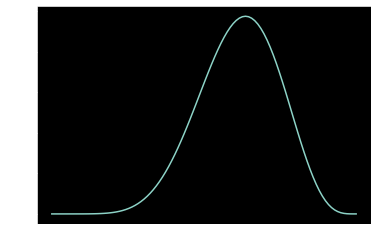

In [3]:
# 自变量-概率, 从 0 到 1 取 100 个点
p = np.linspace(0, 1, 100)
# 实验次数
n = 11
# 成功次数
y = 7
#  因变量-likelihood
l = comb(n, y) * (p ** y) * ((1 - p) ** (n - y))
# x-axis: 概率, y-axis: 概率的可能性(实际值不代表什么含义, 可以认为值越大这个概率的可能性越大)
plt.plot(p, l)

<BarContainer object of 10 artists>

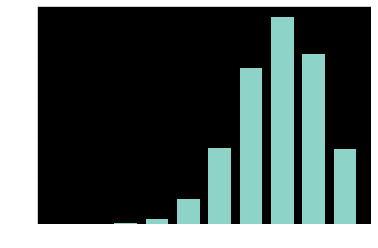

In [4]:
# 自变量-成功次数
y = np.linspace(0, 10, 10)
# 实验测试
n = 11
# 概率
p = 0.7
# 因变量-概率(成功次数的概率)
pt = comb(n, y) * (p ** y) * ((1 - p) ** (n - y))

plt.bar(y, pt)

## The Binomial Probability Function

$$
\mathcal{P}(y | n, p) = \binom{n}{y}p^y(1-p)^{n-y}
$$



## Consultation

- [Bayes for Beginners: Probability and Likelihood](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood#:~:text=Probability%20is%20about%20a%20finite,possible%20probabilities%2C%20given%20an%20outcome.)
- [The Binomial Likelihood Function](https://sites.warnercnr.colostate.edu/gwhite/wp-content/uploads/sites/73/2017/04/BinomialLikelihood.pdf)
